<a href="https://colab.research.google.com/github/scottcohn97/schmelz_bowles/blob/main/schmelz_bowles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Schmelz + Bowles

In [ ]:
install.packages("tidyverse")
install.packages("latex2exp")
install.packages("ggtext")

In [ ]:
library(tidyverse)
library(latex2exp)
library(ggtext)

$$w = \beta_i + \alpha_i \frac{f^\mu}{f^\mu + (1 - f)^\mu},$$

where $i \in \{e, v\}, \; \beta_v > \beta_e, \; \alpha_v > \alpha_e, \; \mu > 1$.

In [3]:
# w, fraction wishing to be vaccinated at time t+1
w <- function(beta, alpha, f, mu) {
  beta + alpha * ((f^mu) / (f^mu + (1 - f)^mu))
} 

# init df
df <- tibble(
  # fraction vaccinated at time t
  f = seq(0, 1, 0.01)
)

## Panel 1

In [4]:
# Add columns
df01 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.15, alpha = 0.7, f = f, mu = 1.9),
         w_v = w(beta = 0.2, alpha = 0.8, f = f, mu = 1.9)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


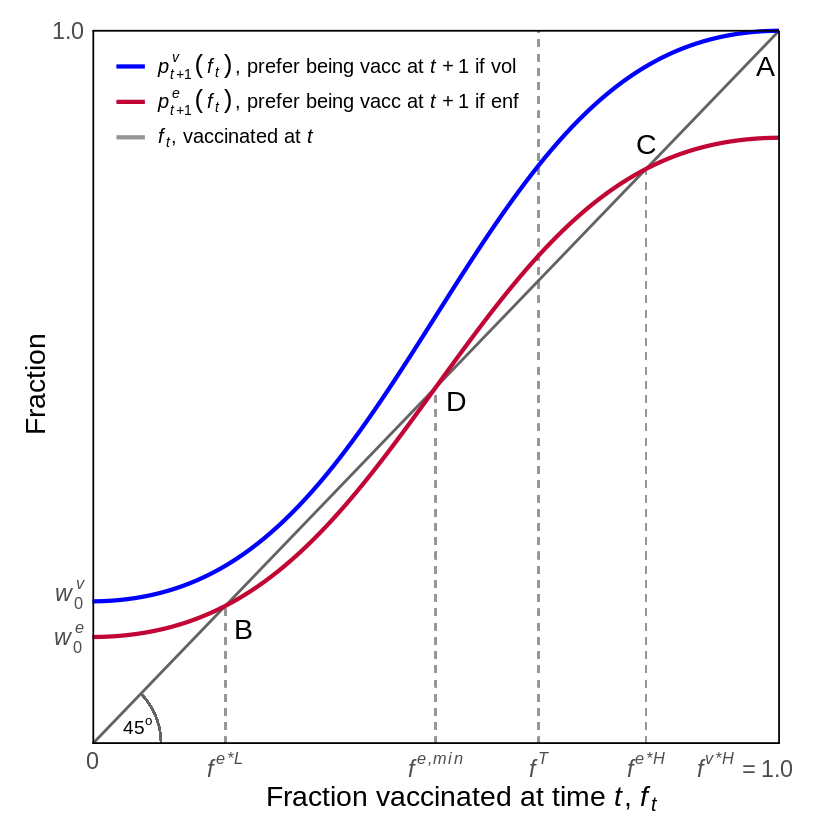

In [7]:
# Base plot
p1 <- df01 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.1937, y = 0, xend = 0.1937, yend = 0.1937, color = "#969696", linetype = 2) +
  geom_segment(x = 0.5, y = 0, xend = 0.5, yend = 0.5, color = "#969696", linetype = 2)  +
  geom_segment(x = 0.65, y = 0, xend = 0.65, yend = 1, aes(color = "#969696"), linetype = 2)  +
  geom_segment(x = 0.8063, y = 0, xend = 0.8063, yend = 0.8063, color = "#969696", linetype = 2)  +
  geom_line(aes(y = f), color = "#636363", linetype = 1, size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) +
  geom_curve(aes(x = .1, y = 0, xend = sqrt(2)/20, yend = sqrt(2)/20), data = df01, curvature = 0.2, color = "#636363")
  
# Add labels + Annotations
p2 <- p1 + 
  #xlab("Fraction vaccinated at time *t*, *f*<sub>*t*</sub>") +
  #xlab("% vaccinated at time *t*, *f*<sub>*t*</sub>") +
  xlab(bquote("Fraction vaccinated at time " * italic(t) * ", " * italic(f[t]))) +
  #ylab("Fraction willing to be vaccinated at time *t+1*, *w*<sub>*t+1*</sub>") +
  ylab("Fraction") +
  annotate("text", x = 0.065, y = 0.025, label = TeX("45^{o}"), size = 4) +
  annotate("text", x = .22, y = .16, label = "B", size = 6) +
  annotate("text", x = .98, y = .95, label = "A", size = 6) +
  annotate("text", x = 0.8063, y = 0.84, label = "C", size = 6) +
  annotate("text", x = 0.53, y = 0.48, label = "D", size = 6)

# Add theme elements
p3 <- p2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1.075), expand = c(0, 0),
    breaks = c(0, 0.1937, 0.5, 0.65, 0.8063, 0.95),
    labels = c("0",
               expression(italic(f^{ paste(e,"*",L)})), 
               expression(italic(f^{ paste(e,",", min)})), 
               expression(italic(f^T)), 
               expression(italic(f^{ paste(e,"*",H)})), 
               bquote(italic(f^{ paste(v,"*",H)}) == phantom() * "1.0"))) + 
               #expression(italic(f^{ paste(v,"*",H)} == phantom()), "1.0"))) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0),
    breaks = c(0.148, 0.21, 1), 
    labels = c(expression(italic(w[0]^e)), 
               expression(italic(w[0]^v)), 
               "1.0")) +
  # color
  scale_color_manual(name = element_blank(),
    values = c("#969696", "#c10534", "#0000ff"),
    labels = c(bquote(italic(f[t]) * ", vaccinated at " * italic(t)),
               bquote(italic(p[t+1]^e) * italic((f[t])) * ", prefer being vacc at " * italic(t+1) * " if enf"),
               bquote(italic(p[t+1]^v) * italic((f[t])) * ", prefer being vacc at " * italic(t+1) * " if vol")),
               guide = guide_legend(reverse = TRUE)) + 
  # theme
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.30,0.9),
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.75, "cm"),
    axis.title.x = element_text(size = 17),
    #axis.title.x = ggtext::element_markdown(size = 17),
    axis.title.y = element_text(size = 17, angle = 90, vjust = 0.5),
    #axis.title.y = ggtext::element_markdown(size = 17),
    axis.text = element_text(size = 14),
    plot.margin = margin(.5, .2, .5, .5, "cm") 
    ) +
  annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) 

p3

In [8]:
# Save plot
ggsave(file = "schmelz_bowles_01.pdf", plot = p3, width = 7, height = 7)
ggsave(file = "schmelz_bowles_01.png", plot = p3, width = 7, height = 7)

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


## Panel 2

In [10]:
# Add columns
df2 <- df %>% 
  # Add vaccine adoption vals
  mutate(w_e = w(beta = 0.05, alpha = 0.7, f = f, mu = 1.9),
         w_v = w(beta = 0.1, alpha = 0.8, f = f, mu = 1.9)) %>% 
  # Force frac ceiling
  mutate(w_v = if_else(w_v > 1, 1, w_v)) %>%
  # Reshape for plot
  pivot_longer(!f, names_to = "w", values_to = "w_val")

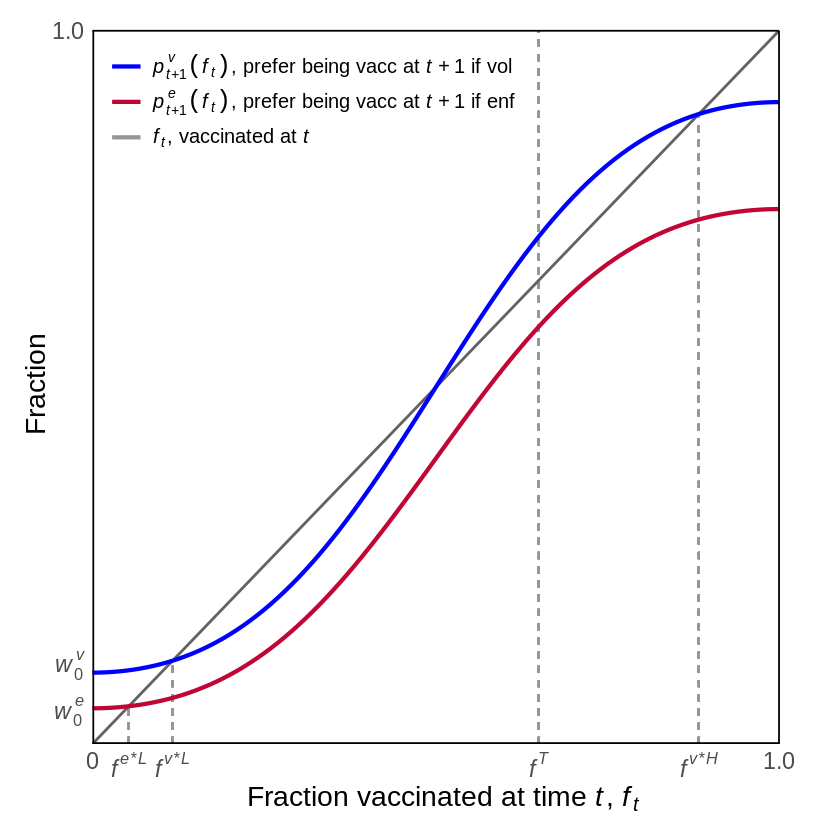

In [12]:
# Base plot
g1 <- df2 %>% ggplot(aes(x = f, y = w_val)) + 
  geom_segment(x = 0.0529, y = 0, xend = 0.0529, yend = 0.0529, color = "#969696", linetype = 2) +
  geom_segment(x = 0.1168, y = 0, xend = 0.1168, yend = 0.1168, color = "#969696", linetype = 2) +
  geom_segment(x = 0.65, y = 0, xend = 0.65, yend = 1.0, aes(color = "#969696"), linetype = 2) +
  geom_segment(x = 0.8832, y = 0, xend = 0.8832, yend = 0.8832, color = "#969696", linetype = 2) +
  geom_line(aes(y = f), color = "#636363", linetype = 1, size = 0.8) + 
  geom_line(aes(color = w), size = 1.2) 

# Add labels and annotation
g2 <- g1 + 
  #xlab("Fraction vaccinated at time *t*, *f*<sub>*t*</sub>") +
  #xlab("% vaccinated at time *t*, *f*<sub>*t*</sub>") +
  xlab(bquote("Fraction vaccinated at time " * italic(t) * ", " * italic(f[t]))) +
  #ylab("Fraction willing to be vaccinated at time *t+1*, *w*<sub>*t+1*</sub>") +
  ylab("Fraction") 

# Add theme elements
g3 <- g2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1.02), expand = c(0, 0),
    breaks = c(0, 0.0529, 0.1168, 0.65, 0.8832, 1.0), 
    labels = c("0",
               expression(italic(f^{ paste(e,"*",L)})),
               expression(italic(f^{ paste(v,"*",L)})),
               expression(italic(f^T)),
               expression(italic(f^{ paste(v,"*",H)})), 
               "1.0")) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0),
    breaks = c(0.045, 0.11, 1), 
    labels = c(expression(italic(w[0]^e)), 
                expression(italic(w[0]^v)), 
               "1.0")) +
  # color
  scale_color_manual(name = element_blank(),
    values = c("#969696", "#c10534", "#0000ff"),
    labels = c(bquote(italic(f[t]) * ", vaccinated at " * italic(t)),
               bquote(italic(p[t+1]^e) * italic((f[t])) * ", prefer being vacc at " * italic(t+1) * " if enf"),
               bquote(italic(p[t+1]^v) * italic((f[t])) * ", prefer being vacc at " * italic(t+1) * " if vol" )),
               guide = guide_legend(reverse = TRUE)) + 
  # theme
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.31,0.9),
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.75, "cm"),
    axis.title.x = element_text(size = 17),
    #axis.title.x = ggtext::element_markdown(size = 17),
    axis.title.y = element_text(size = 17, angle = 90, vjust = 0.5),
    #axis.title.y = ggtext::element_markdown(size = 17),
    axis.text = element_text(size = 14),
    plot.margin = margin(.5, 1, .5, .5, "cm")
    ) +
    annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
    annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
    annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
    annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) 

g3

In [13]:
# Save plot
ggsave(file = "schmelz_bowles_02.pdf", plot = g3, width = 7, height = 7)
ggsave(file = "schmelz_bowles_02.png", plot = g3, width = 7, height = 7)

# Vacc Distro PDF

In [ ]:
df01 %>% tail()

f,w,w_val
<dbl>,<chr>,<dbl>
0.98,w_e,0.8495700
0.98,w_v,0.9995086
0.99,w_e,0.8498869
0.99,w_v,0.9998708
1.00,w_e,0.8500000
1.00,w_v,1.0000000


The `w_val` column represents the CDF. We want to get a PDF, but first we need to reshape.

In [14]:
df01w <- df01 %>% 
  pivot_wider(names_from = w, values_from = w_val) %>%
  #head()
  identity()

Can use functions to get deriv, or just diff lagged var 

In [15]:
we_prime <- function(f){
  1.33 * (f^(1.9) * (1 - f)^(0.9) + f^(0.9) * (1 - f)^(1.9)) / (f^(1.9) + (1 - f)^1.9)^2
}

wv_prime <- function(f){
  1.52 * (f^(1.9) * (1 - f)^(0.9) + f^(0.9) * (1 - f)^(1.9)) / (f^(1.9) + (1 - f)^1.9)^2
}

In [16]:
# pdf for enforcement

df01w_pdf <- 
  df01w %>%
    mutate(w_e_pdf = w_e,
          w_v_pdf = w_v) %>%

    # take deriv - lag
    mutate(w_e_pdf = (w_e - lag(w_e)) / (f - lag(f)), 
          w_v_pdf = (w_v - lag(w_v)) / (f - lag(f))) %>% 

    # take deriv - func
    #mutate(w_e_pdf = (we_prime(f)), 
    #      w_v_pdf = (wv_prime(f))) %>%

    # reshape (sep for two axis)
    pivot_longer(!c(f, w_e_pdf, w_v_pdf), names_to = "w", values_to = "w_val") %>%
    pivot_longer(!c(f, w_val, w), names_to = "w_pdf", values_to = "w_val_pdf") %>%
    mutate(w_val_pdf = if_else(is.na(w_val_pdf), 0, w_val_pdf)) %>%
    #head() %>%
    identity ()

In [ ]:
df01w_pdf %>% head(10)

f,w,w_val,w_pdf,w_val_pdf
<dbl>,<chr>,<dbl>,<chr>,<dbl>
0.00,w_e,0.1500000,w_e_pdf,0.00000000
0.00,w_e,0.1500000,w_v_pdf,0.00000000
0.00,w_v,0.2000000,w_e_pdf,0.00000000
0.00,w_v,0.2000000,w_v_pdf,0.00000000
0.01,w_e,0.1501131,w_e_pdf,0.01130631
0.01,w_e,0.1501131,w_v_pdf,0.01292150
0.01,w_v,0.2001292,w_e_pdf,0.01130631
0.01,w_v,0.2001292,w_v_pdf,0.01292150
0.02,w_e,0.1504300,w_e_pdf,0.03169271


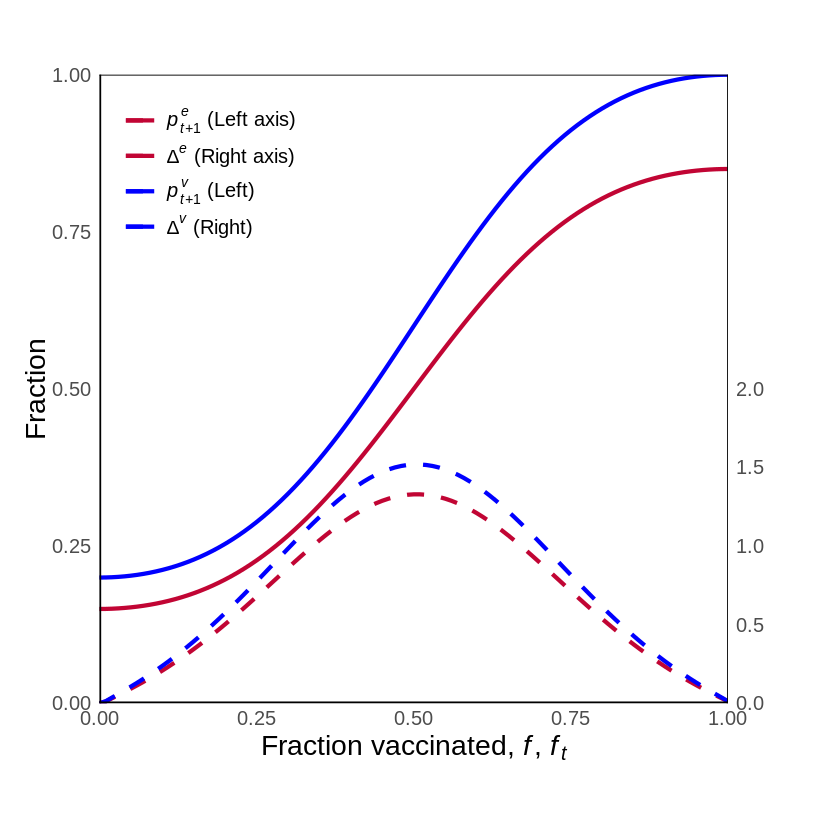

In [17]:
# Double Axis Plot

coeff <- 4

vacc_distro_pdf <-
  df01w_pdf %>% 
    ggplot(aes(x = f)) +
      geom_line(aes(y = w_val, color = w), size = 1.2) + 
      geom_line(aes(y = w_val_pdf / coeff, color = w_pdf), size = 1.2, linetype = 2) + 
      scale_y_continuous(expand = c(0, 0),
        name = "Fraction",
        sec.axis = sec_axis(~.*coeff, name = "", breaks = seq(0, 2, 0.5)),
        breaks = seq(0, 1, 0.25)
        ) +
      scale_x_continuous(expand = c(0, 0)) +
      scale_color_manual(values = c("#c10534", "#c10534", "#0000ff", "#0000ff"),
        labels = c(
          expression(paste(italic(p[t+1]^e), " (Left axis)")), 
          expression(paste(italic(Delta^e), " (Right axis)")),
          expression(paste(italic(p[t+1]^v), " (Left)")), 
          expression(paste(italic(Delta^v), " (Right)"))
          )) +
      labs(x = bquote("Fraction vaccinated, " * italic(f) * ", " * italic(f[t]))) +
      coord_equal() +
      theme_minimal() + 
      theme(
        panel.grid = element_blank(),
        legend.title = element_blank(),
        legend.position = c(0.175,0.85),
        legend.text = element_text(size = 12),
        legend.key.size = unit(0.75, "cm"),
        legend.text.align = 0,
        axis.title.x = element_text(size = 17),
        #axis.title.x = ggtext::element_markdown(size = 17),
        axis.title.y = element_text(size = 17, angle = 90, vjust = 0.5, hjust = .5),
        #axis.title.y = ggtext::element_markdown(size = 17),
        axis.text = element_text(size = 12),
        plot.margin = margin(.5, 1, .5, .5, "cm")
        ) +
        annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
        annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
        annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
        annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) +
        NULL

vacc_distro_pdf

In [18]:
ggsave("vacc_distro.pdf", plot = vacc_distro_pdf)
ggsave("vacc_distro.png", plot = vacc_distro_pdf)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image



# Simple Model

Here is a simple (but unrealistic) model based on a uniform distribution of resistances to vaccine:

$$p_{t+1} = p_0 + \alpha f_t$$

In [33]:
pt1 <- function(p0, alpha, f) {
  p0 + (alpha * f)
}

In [35]:
# init df
df_sm <- tibble(
  # number fraction vaccinated at time t
  f = seq(0, 1, .01)
)

# Add columns
df_sm <- df_sm %>% 
  # Add vaccine adoption vals
  mutate(p = pt1(p0 = 0.25, alpha = 0.5, f = f),
         p2 = pt1(p0 = 0.3, alpha = 0.5, f = f)) %>% 
  # Reshape for plot
  #pivot_longer(!f, names_to = "p", values_to = "p_val") %>%
  identity()

In [ ]:
df_sm %>% head()

f,p,p2
<dbl>,<dbl>,<dbl>
0.00,0.250,0.300
0.01,0.255,0.305
0.02,0.260,0.310
0.03,0.265,0.315
0.04,0.270,0.320
0.05,0.275,0.325


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


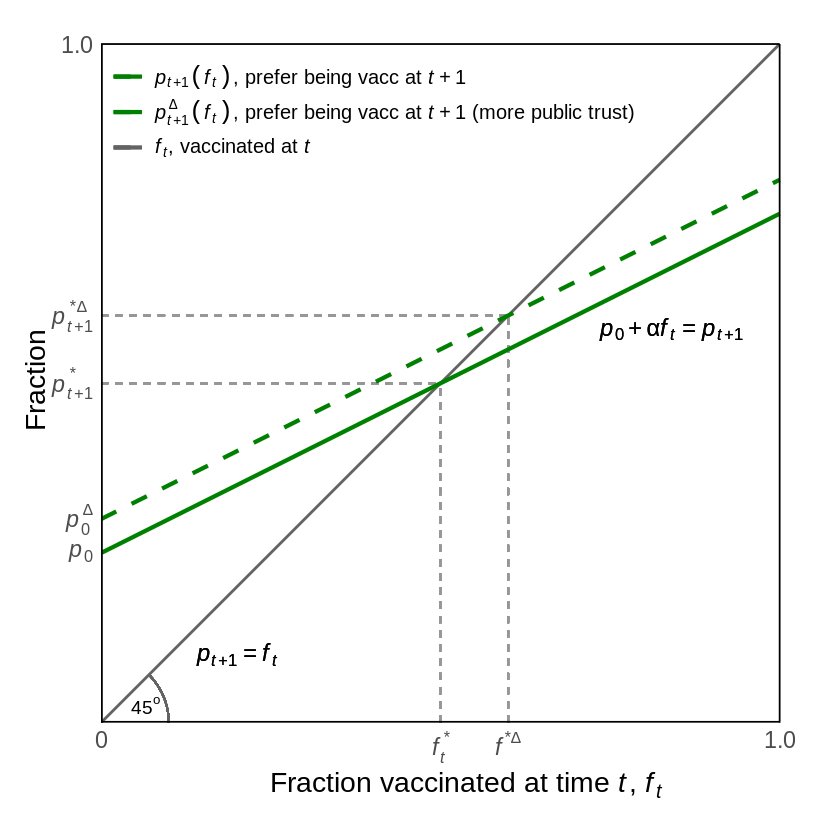

In [40]:
# Base plot
sm1 <- df_sm %>% ggplot(aes(x = f)) + 
  geom_segment(x = 0.5, y = 0, xend = 0.5, yend = 0.5, color = "#969696", linetype = 2, size = 0.5) +
  geom_segment(x = 0.0, y = 0.5, xend = 0.5, yend = 0.5, color = "#969696", linetype = 2, size = 0.5) +
  geom_segment(x = 0.6, y = 0, xend = 0.6, yend = 0.6, color = "#969696", linetype = 2, size = 0.5) +
  geom_segment(x = 0.0, y = 0.6, xend = 0.6, yend = 0.6, color = "#969696", linetype = 2, size = 0.5) +
  geom_line(aes(y = f, color = "#636363"), linetype = 1, size = 0.8) + 
  geom_line(aes(y = p, color = "p"), size = 1.2) +
  geom_line(aes(y = p2, color = "p2"), size = 1.2, linetype = 2) +
  geom_curve(aes(x = .1, y = 0, xend = sqrt(2)/20, yend = sqrt(2)/20), data = df_sm, curvature = 0.2, color = "#636363")

  # Add labels + Annotations
sm2 <- sm1 + 
  #xlab("Fraction vaccinated at time *t*, *f*<sub>*t*</sub>") +
  #xlab("% vaccinated at time *t*, *f*<sub>*t*</sub>") +
  xlab(bquote("Fraction vaccinated at time " * italic(t) * ", " * italic(f[t]))) +
  #ylab("Fraction willing to be vaccinated at time *t+1*, *w*<sub>*t+1*</sub>") +
  ylab("Fraction") +
  annotate("text", x = 0.065, y = 0.025, label = TeX("45^{o}"), size = 4) + 
  annotate("text", x = 0.2, y = 0.1, label = bquote(italic(p[t+1] == f[t])), size = 5) +
  annotate("text", x = 0.84, y = 0.58, label = bquote(italic(p[0] + alpha * f[t] == p[t + 1])), size = 5)

# Add theme elements
sm3 <- sm2 + 
  # remove buffer
  scale_x_continuous(limits = c(0,1.075), expand = c(0, 0),
    breaks = c(0, 0.5, 0.6, 1),
    labels = c(expression("0"),
               expression(italic(f[t]^{ "*" })),  
               expression(italic(f^{ paste("*", Delta)})), 
               expression("1.0"))) +
  scale_y_continuous(limits = c(0,1.01), expand = c(0, 0),
    breaks = c(0.25, 0.3, 0.5, 0.6, 1), 
    labels = c(expression(italic(p[0])),
               expression(italic(p[0]^{Delta})), 
               expression(italic(p[t + 1]^{"*"})), 
               expression(italic(p[t + 1]^{paste("*", Delta)})), 
               "1.0")) +
  # color
  scale_color_manual(name = element_blank(),
    values = c("#636363", "#008000", "#008000"),
    labels = c(bquote(italic(f[t]) * ", vaccinated at " * italic(t)),
               bquote(italic(p[t+1]^Delta) * italic((f[t])) * ", prefer being vacc at " * italic(t+1) * " (more public trust)"),
               bquote(italic(p[t+1]) * italic((f[t])) * ", prefer being vacc at " * italic(t+1))),
               guide = guide_legend(reverse = TRUE)) + 
  # theme
  coord_equal() +
  theme_minimal() + 
  theme(
    panel.grid = element_blank(),
    legend.position = c(0.37, 0.9),
    legend.text = element_text(size = 12),
    legend.key.size = unit(0.75, "cm"),
    axis.title.x = element_text(size = 17),
    #axis.title.x = ggtext::element_markdown(size = 17),
    axis.title.y = element_text(size = 17, angle = 90, vjust = 0.55),
    #axis.title.y = ggtext::element_markdown(size = 17),
    axis.text = element_text(size = 14),
    plot.margin = margin(.5, .2, .5, .5, "cm") 
    ) +
  annotate(geom = 'segment', y = 1, yend = 1, color = 'black', x = -Inf, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 0, yend = 0, color = 'black', x = -Inf, xend = 1, size = 1) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 1, xend = 1, size = 0.5) +
  annotate(geom = 'segment', y = 1, yend = 0, color = 'black', x = 0, xend = 0, size = 1) 

sm3

In [41]:
ggsave("simple_model.pdf", plot = sm3)
ggsave("simple_model.png", plot = sm3)

Saving 6.67 x 6.67 in image

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Saving 6.67 x 6.67 in image

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'language'”


# Trunc Normal


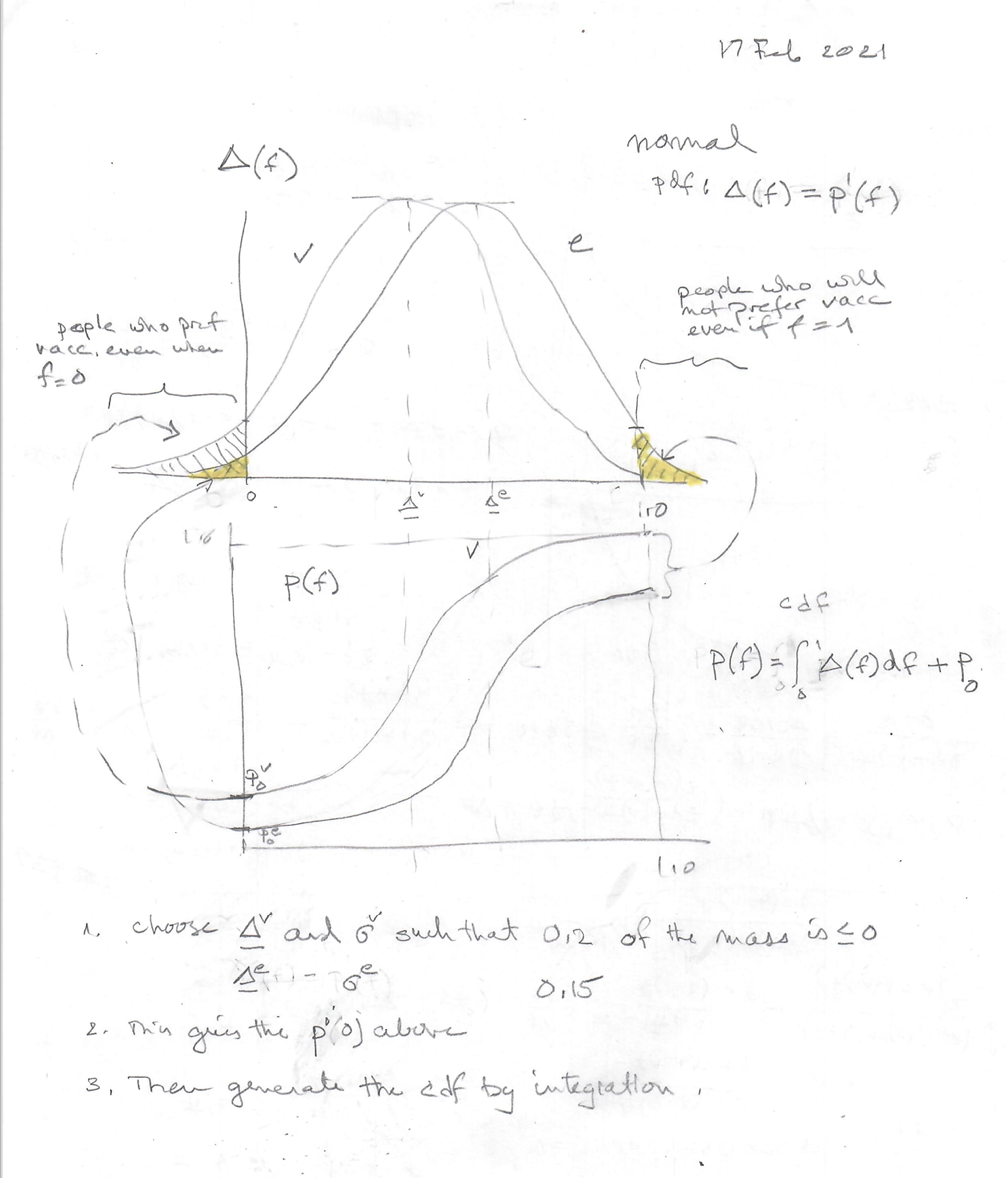

In [11]:
# construct tibble

df_norm <- tibble(
  x1 = seq(-8, 19, 0.1),
  x2 = seq(-11, 16, 0.1)
)

m1 <- 5.5
sd1 <- 3

m2 <- 2.5
sd2 <- sd1

df_norm <- 
  df_norm %>%
  mutate( 
    y1p = dnorm(x1, mean = m1, sd = sd1),
    y1c = pnorm(x1, mean = m1, sd = sd1),
    y2p = dnorm(x2, mean = m2, sd = sd2),
    y2c = pnorm(x2, mean = m2, sd = sd2))


Warning message:
“Removed 80 row(s) containing missing values (geom_path).”
Warning message:
“Removed 110 row(s) containing missing values (geom_path).”


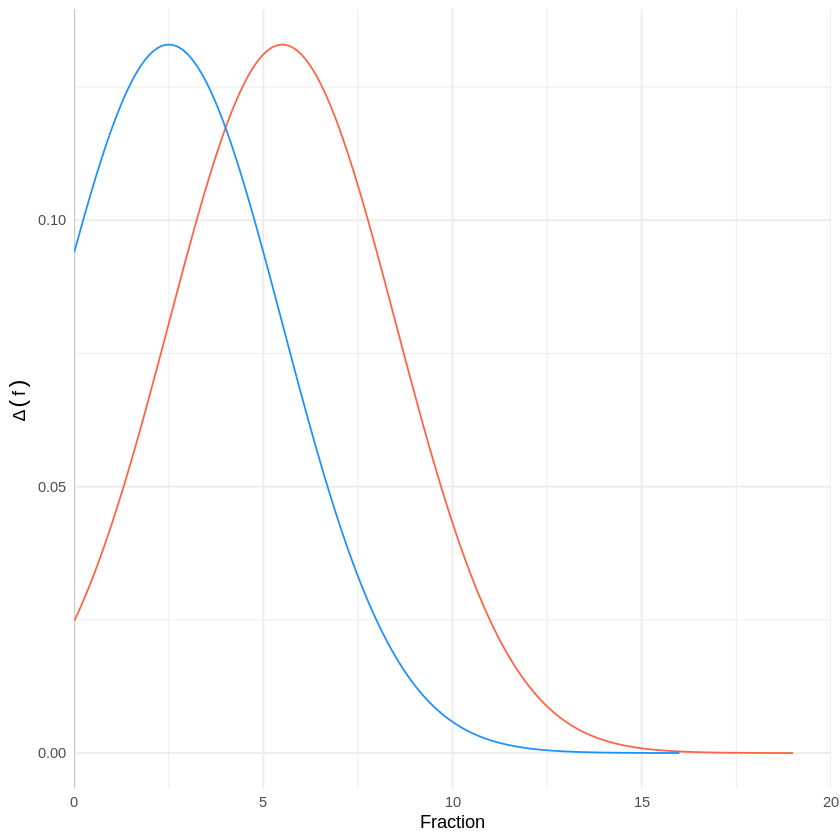

In [16]:
pdf_plot1 <- df_norm %>%
  ggplot() +
  geom_vline(aes(xintercept = 0), color = "grey") +
  geom_line(aes(x = x1, y = y1p), linetype = 1, color = "tomato") +
  #geom_line(aes(x = x1, y = y1c), linetype = 1, color = "tomato", linetype = 2) +  
  geom_line(aes(x = x2, y = y2p), linetype = 1, color = "dodgerblue") + 
  #geom_line(aes(x = x2, y = y2c), linetype = 1, color = "dodgerblue", linetype = 2) +
  NULL

pdf_plot2 <- pdf_plot1 +
  scale_x_continuous(limits = c(0, 20), expand = c(0, 0)) +
  #scale_y_continuous(expand = c(0, 0)) +
  labs(y = bquote(Delta (f)), x = "Fraction") + 
  theme_minimal()

pdf_plot2

Warning message:
“Duplicated aesthetics after name standardisation: linetype”
Warning message:
“Duplicated aesthetics after name standardisation: linetype”
Warning message:
“Removed 130 row(s) containing missing values (geom_path).”
Warning message:
“Removed 130 row(s) containing missing values (geom_path).”


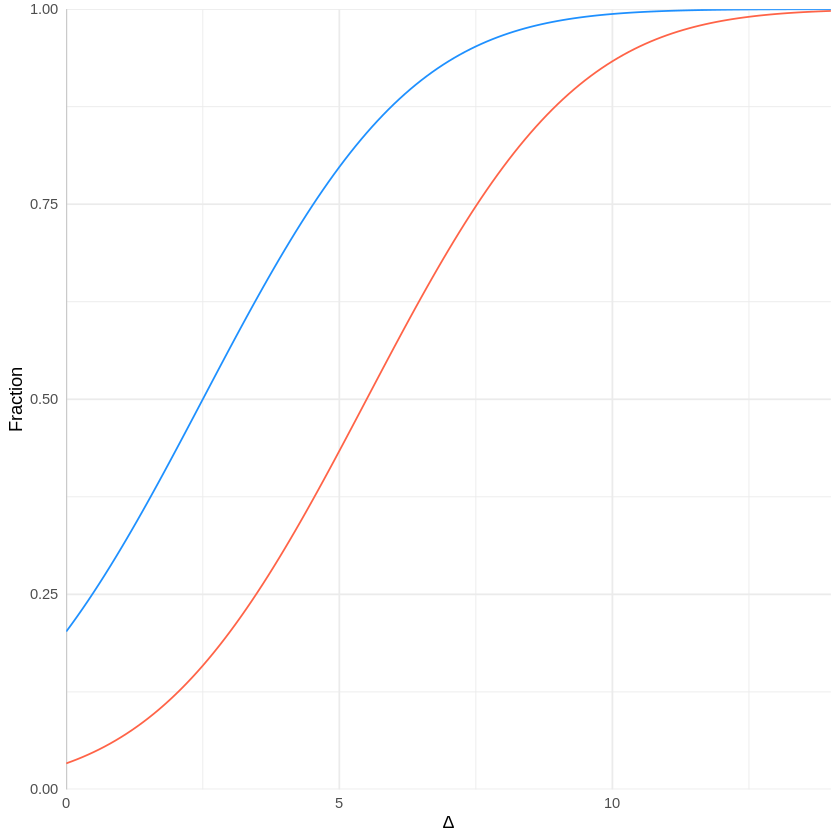

In [13]:
cdf_plot1 <- df_norm %>%
  ggplot() +
  geom_vline(aes(xintercept = 0), color = "grey") +
  #geom_line(aes(x = x1, y = y1p), linetype = 1, color = "tomato") +
  geom_line(aes(x = x1, y = y1c), linetype = 1, color = "tomato", linetype = 2) +  
  #geom_line(aes(x = x2, y = y2p), linetype = 1, color = "dodgerblue") + 
  geom_line(aes(x = x2, y = y2c), linetype = 1, color = "dodgerblue", linetype = 2) +
  NULL

cdf_plot2 <- cdf_plot1 + 
  scale_x_continuous(limits = c(0, 14), expand = c(0, 0)) +
  scale_y_continuous(limits = c(0, 1), expand = c(0, 0)) +
  labs(x = bquote(Delta), y = "Fraction") + 
  theme_minimal()

cdf_plot2

In [84]:
ggsave("trunc_pdf_plot.pdf", plot = pdf_plot2)
ggsave("trunc_cdf_plot.pdf", plot = cdf_plot2)

Saving 6.67 x 6.67 in image

Saving 6.67 x 6.67 in image

Warning message:
“Removed 20 row(s) containing missing values (geom_path).”
Warning message:
“Removed 50 row(s) containing missing values (geom_path).”


# Session Info

In [42]:
# Session Info
sessionInfo()

R version 4.0.4 (2021-02-15)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggtext_0.1.1    latex2exp_0.4.0 forcats_0.5.1   stringr_1.4.0  
 [5] dplyr_1.0.4     purrr_0.3.4     readr_1.4.0     tidyr_1.1.2    
 [9] tibble_3.0.6    ggplot2_3.3.3   tidyverse_1.3.0

loaded via a namespace (and not attached):
 [1] pbdZMQ_0.3-5      tidyselect_1